In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nengo
import nengo_spa as spa

import nengo_encoder_learning as nel

In [2]:
n_neurons = 100
dimensions = 2

In [3]:
n_vecs = 5

rng = np.random.RandomState(seed=8)

vec1 = np.array([1, 1])
clust_vecs = []
for nn in range(n_vecs):
    tmp_vec = vec1 + rng.normal(scale=0.1, size=2)
    tmp_vec /= np.linalg.norm(tmp_vec)
    clust_vecs.append(tmp_vec)

clust_vecs = np.array(clust_vecs)
print(np.linalg.norm(np.mean(clust_vecs)))

vec2 = np.array([-1, -1])
sprd_vecs = []
for nn in range(n_vecs):
    tmp_vec = vec2 + rng.normal(scale=0.5, size=2)
    tmp_vec /= np.linalg.norm(tmp_vec)
    sprd_vecs.append(tmp_vec)

sprd_vecs = np.array(sprd_vecs)
print(np.linalg.norm(np.mean(sprd_vecs)))

0.7031170671088868
0.6604427197034959


(-1.1, 1.1)

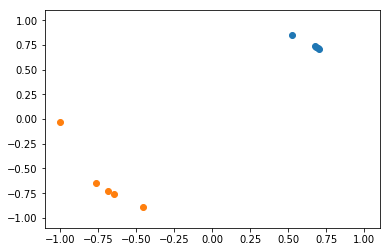

In [4]:
plt.scatter(clust_vecs[:, 0], clust_vecs[:, 1], label="cluster")
plt.scatter(sprd_vecs[:, 0], sprd_vecs[:, 1], label="spread")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Clean vecs

In [5]:
all_vecs = np.concatenate((clust_vecs, sprd_vecs))

In [25]:
with nengo.Network() as model:
    ens = nengo.Ensemble(n_neurons=n_neurons, dimensions=dimensions,
                         intercepts=nengo.dists.CosineSimilarity(dimensions+2))
    
    output = nengo.Node(size_in=dimensions)
    
    c = nengo.Connection(ens, output, eval_points=all_vecs)

In [28]:
res = nel.improve_with_hist(c, learning_rate=1e-2, steps=1000, seed=0)

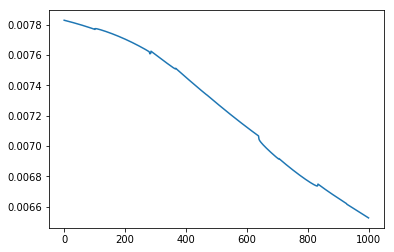

In [29]:
plt.plot(res["error"])

In [30]:
enc = np.array(res["encoders"])

In [31]:
enc[:, 0].shape

(1000, 2)

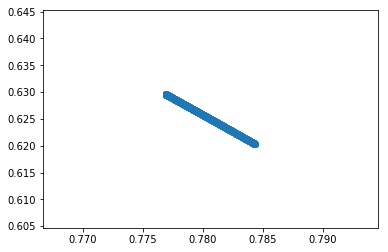

In [32]:
plt.scatter(enc[:, 0, 0], enc[:, 0, 1])

In [33]:
diff = np.sum(np.sum(np.abs(np.diff(enc, axis=0)), axis=0), axis=1)
diff_idx = np.argsort(diff)

In [34]:
diff_idx[0]

26

(-1.1, 1.1)

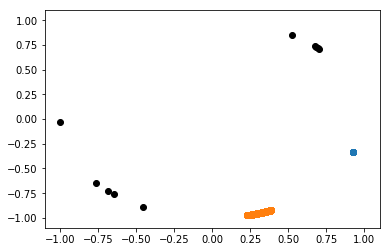

In [36]:
plt.scatter(enc[:, diff_idx[0], 0], enc[:, diff_idx[1], 1])
plt.scatter(enc[:, diff_idx[-1], 0], enc[:, diff_idx[-1], 1])
plt.scatter(clust_vecs[:, 0], clust_vecs[:, 1], label="cluster", color='k')
plt.scatter(sprd_vecs[:, 0], sprd_vecs[:, 1], label="spread", color='k')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Noisier vecs

In [159]:
clust_eval = []
clust_func = []
sprd_eval = []
sprd_func = []


mag = 0.2

for n in range(10):
    clust_eval.append(clust_vecs + np.random.normal(size=clust_vecs.shape) * mag)
    clust_func.append(clust_vecs)

    sprd_eval.append(sprd_vecs + np.random.normal(size=sprd_vecs.shape) * mag)
    sprd_func.append(sprd_vecs)

clust_eval = np.concatenate(clust_eval)
clust_eval /= np.linalg.norm(clust_eval, axis=1, keepdims=True)
clust_func = np.concatenate(clust_func)

sprd_eval = np.concatenate(sprd_eval)
sprd_eval /= np.linalg.norm(sprd_eval, axis=1, keepdims=True)
sprd_func = np.concatenate(sprd_func)

(-1.1, 1.1)

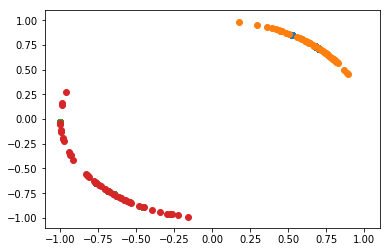

In [160]:
plt.scatter(clust_func[:, 0], clust_func[:, 1], label="cluster")
plt.scatter(clust_eval[:, 0], clust_eval[:, 1], label="noised cluster")
plt.scatter(sprd_func[:, 0], sprd_func[:, 1], label="spread")
plt.scatter(sprd_eval[:, 0], sprd_eval[:, 1], label="noised spread")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

In [161]:
eval_points = np.concatenate((clust_eval, sprd_eval))
print(eval_points.shape)

func = np.concatenate((clust_func, sprd_func))
print(func.shape)

(100, 2)
(100, 2)


In [167]:
with nengo.Network() as model:
    ens = nengo.Ensemble(n_neurons=n_neurons, dimensions=dimensions,
                         intercepts=nengo.dists.CosineSimilarity(dimensions+2))
    
    output = nengo.Node(size_in=dimensions)
    
    c = nengo.Connection(ens, output, eval_points=eval_points, function=func)

In [170]:
res = nel.improve_with_hist(c, learning_rate=1e-4, steps=3000, seed=0)

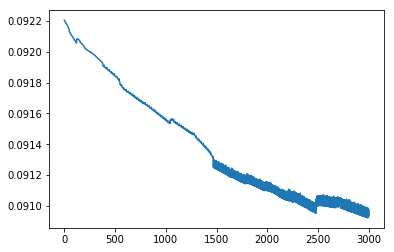

In [171]:
plt.plot(res["error"])

In [172]:
enc = np.array(res["encoders"])

In [173]:
enc[:, 0].shape

(3000, 2)

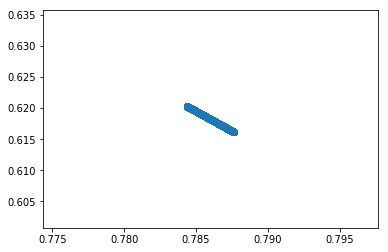

In [174]:
plt.scatter(enc[:, 0, 0], enc[:, 0, 1])

In [175]:
diff = np.sum(np.sum(np.abs(np.diff(enc, axis=0)), axis=0), axis=1)
diff_idx = np.argsort(diff)

(-1.1, 1.1)

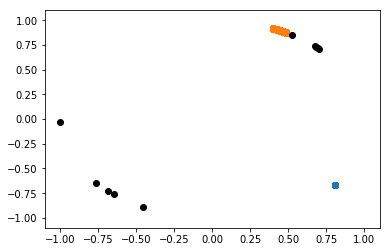

In [176]:
plt.scatter(enc[:, diff_idx[0], 0], enc[:, diff_idx[1], 1])
plt.scatter(enc[:, diff_idx[-1], 0], enc[:, diff_idx[-1], 1])
plt.scatter(clust_vecs[:, 0], clust_vecs[:, 1], label="cluster", color='k')
plt.scatter(sprd_vecs[:, 0], sprd_vecs[:, 1], label="spread", color='k')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

(-1.1, 1.1)

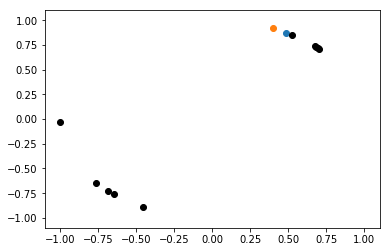

In [177]:
plt.scatter(enc[0, diff_idx[-1], 0], enc[0, diff_idx[-1], 1])
plt.scatter(enc[-1, diff_idx[-1], 0], enc[-1, diff_idx[-1], 1])
plt.scatter(clust_vecs[:, 0], clust_vecs[:, 1], label="cluster", color='k')
plt.scatter(sprd_vecs[:, 0], sprd_vecs[:, 1], label="spread", color='k')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

(-1.1, 1.1)

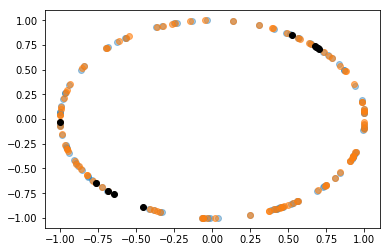

In [178]:
plt.scatter(enc[0, :, 0], enc[0, :, 1], alpha=0.4)
plt.scatter(enc[-1, :, 0], enc[-1, :, 1], alpha=0.6)
plt.scatter(clust_vecs[:, 0], clust_vecs[:, 1], label="cluster", color='k')
plt.scatter(sprd_vecs[:, 0], sprd_vecs[:, 1], label="spread", color='k')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

(-1.1, 1.1)

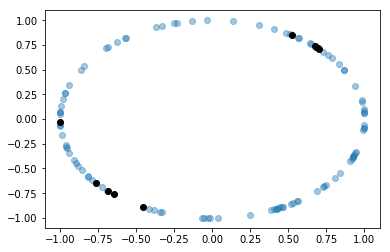

In [179]:
plt.scatter(enc[0, :, 0], enc[0, :, 1], alpha=0.4)
plt.scatter(clust_vecs[:, 0], clust_vecs[:, 1], label="cluster", color='k')
plt.scatter(sprd_vecs[:, 0], sprd_vecs[:, 1], label="spread", color='k')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

(-1.1, 1.1)

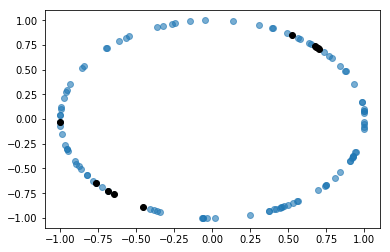

In [180]:
plt.scatter(enc[-1, :, 0], enc[-1, :, 1], alpha=0.6)
plt.scatter(clust_vecs[:, 0], clust_vecs[:, 1], label="cluster", color='k')
plt.scatter(sprd_vecs[:, 0], sprd_vecs[:, 1], label="spread", color='k')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)